In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1.2, style = 'darkgrid')

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#change display into using full screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
#import .csv file
data = pd.read_csv('FB_data_age_gender.csv')

# 1. Data Exploration & Cleaning

### 1. Have a first look at data

In [4]:
data.head()

,Campaign name,Ad set name,Ad name,Age,Gender,Result Type,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),Reporting starts,Reporting ends
0,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,25-34,male,On-Facebook leads,23.0,1.276185,0.116941,1834.360000,79.754783,3.395718,93.266219,19668,251,2019-11-01,2019-12-03
1,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,Image-Minimum Investment & Maximum Profit,25-34,male,On-Facebook leads,37.0,1.911363,0.194287,1998.870000,54.023514,2.938889,104.960618,19044,364,2019-11-01,2019-12-03
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,18-24,male,On-Facebook leads,26.0,1.407616,0.192621,1142.540000,43.943846,3.180490,84.645133,13498,190,2019-11-01,2019-12-03
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,25-34,male,On-Facebook leads,35.0,2.858252,0.271845,1583.980000,45.256571,2.715099,123.027573,12875,368,2019-11-01,2019-12-03
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Image-Minimum Investment & Maximum Profit,25-34,male,On-Facebook leads,19.0,1.735488,0.162435,1274.856313,67.097701,2.381311,108.990024,11697,203,2019-11-01,2019-12-03


In [5]:
#Consider only those records where amount spent > 0
data = data[(data['Amount spent (INR)'] > 0)]

In [6]:
data.shape

(349, 17)

### 2. Drop Columns that are extra

In [7]:
#We see that Reporting Starts and Reporting Ends are additional columns which we don't require. So we drop them
data.drop(['Reporting ends','Reporting starts'],axis = 1, inplace = True)

In [8]:
#look at the data again
data.head()

,Campaign name,Ad set name,Ad name,Age,Gender,Result Type,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all)
0,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,25-34,male,On-Facebook leads,23.0,1.276185,0.116941,1834.360000,79.754783,3.395718,93.266219,19668,251
1,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,Image-Minimum Investment & Maximum Profit,25-34,male,On-Facebook leads,37.0,1.911363,0.194287,1998.870000,54.023514,2.938889,104.960618,19044,364
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,18-24,male,On-Facebook leads,26.0,1.407616,0.192621,1142.540000,43.943846,3.180490,84.645133,13498,190
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,25-34,male,On-Facebook leads,35.0,2.858252,0.271845,1583.980000,45.256571,2.715099,123.027573,12875,368
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Image-Minimum Investment & Maximum Profit,25-34,male,On-Facebook leads,19.0,1.735488,0.162435,1274.856313,67.097701,2.381311,108.990024,11697,203


In [9]:
#check rows and columns in data
data.shape

(349, 15)

#### So, there are 349 rows and 15 columns in the data

### 3. Deal with Null Values

In [10]:
#let's look if any column has null values
data.isnull().sum()

Campaign name                         0
Ad set name                           0
Ad name                               0
Age                                   0
Gender                                0
Result Type                         245
Results                             245
CTR (all)                             0
Result rate                         245
Amount spent (INR)                    0
Cost per result                     245
Frequency                             0
CPM (cost per 1,000 impressions)      0
Impressions                           0
Clicks (all)                          0
dtype: int64

#### From this we can infer that some columns have Null values (basically blank). Let's look at them:
**1. Results & Result Type:** This happened when there was no conversion (Result).

**2. Result rate, Cost per result:** As both these metrics depend on Result, so these are also blank. 

This was bound to happen because not every single day and every ad got a result (conversion). **So it is safe to replace all nulls in Results and Result rate column with 0.**

In [11]:
#Fill all blanks in Results with 0
data['Results'] = data['Results'].fillna(0)
data['Result rate'] = data['Result rate'].fillna(0)

In [12]:
#check how many nulls are still there 
data.isnull().sum()

Campaign name                         0
Ad set name                           0
Ad name                               0
Age                                   0
Gender                                0
Result Type                         245
Results                               0
CTR (all)                             0
Result rate                           0
Amount spent (INR)                    0
Cost per result                     245
Frequency                             0
CPM (cost per 1,000 impressions)      0
Impressions                           0
Clicks (all)                          0
dtype: int64

#### Voila! Results & Result rate column has no nulls now. Let's see what column Results Type is all about. 

In [13]:
data['Result Type'].value_counts()

On-Facebook leads    104
Name: Result Type, dtype: int64

So we infer that 'Result Type' is basically the type of conversion event taking place. It can be either Page Like, Post Like, On-Facebook Lead, Custom Conversion etc. **Since, we are analysing just one campaign here, we can drop this column as it has same meaning throughout data set.**

If we were analysing multiple campaigns, with different objectives, then keeping this column would have made sense.

In [14]:
#Drop Result Type column from data
data.drop(['Result Type'],axis = 1, inplace = True)

In [15]:
#check how many nulls are still there 
data.isnull().sum()

Campaign name                         0
Ad set name                           0
Ad name                               0
Age                                   0
Gender                                0
Results                               0
CTR (all)                             0
Result rate                           0
Amount spent (INR)                    0
Cost per result                     245
Frequency                             0
CPM (cost per 1,000 impressions)      0
Impressions                           0
Clicks (all)                          0
dtype: int64

Now we need to deal with **Cost per result**.
The cases where CPA is Null means that there was no conversion. So ideally, in these cases the CPA should be very high (in case a conversion actually happened).

#### So, let's leave this column as it is because we can't assign any value for records where no conversion happened.

In [16]:
#Have a look at data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 349
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Campaign name                     349 non-null    object 
 1   Ad set name                       349 non-null    object 
 2   Ad name                           349 non-null    object 
 3   Age                               349 non-null    object 
 4   Gender                            349 non-null    object 
 5   Results                           349 non-null    float64
 6   CTR (all)                         349 non-null    float64
 7   Result rate                       349 non-null    float64
 8   Amount spent (INR)                349 non-null    float64
 9   Cost per result                   104 non-null    float64
 10  Frequency                         349 non-null    float64
 11  CPM (cost per 1,000 impressions)  349 non-null    float64
 12  Impressi

# 2. Feature Engineering

Make new and better features from using the current available features

### 1. We can divide Frequency in buckets

In [17]:
data['Frequency'] = data['Frequency'].apply(lambda x:'1 to 2' if x<2
                                               else '2 to 3' if x>=2 and x<3 
                                               else '3 to 4' if x>=3 and x<4
                                               else '4 to 5' if x>=4 and x<5
                                               else 'More than 5')

In [18]:
data.head()

,Campaign name,Ad set name,Ad name,Age,Gender,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all)
0,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,25-34,male,23.0,1.276185,0.116941,1834.360000,79.754783,3 to 4,93.266219,19668,251
1,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,Image-Minimum Investment & Maximum Profit,25-34,male,37.0,1.911363,0.194287,1998.870000,54.023514,2 to 3,104.960618,19044,364
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,18-24,male,26.0,1.407616,0.192621,1142.540000,43.943846,3 to 4,84.645133,13498,190
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,25-34,male,35.0,2.858252,0.271845,1583.980000,45.256571,2 to 3,123.027573,12875,368
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Image-Minimum Investment & Maximum Profit,25-34,male,19.0,1.735488,0.162435,1274.856313,67.097701,2 to 3,108.990024,11697,203


### 2. Split Ad name into Ad Format and Ad Headline

In [19]:
data['Ad_name'] = data['Ad name']

In [20]:
data.head()

,Campaign name,Ad set name,Ad name,Age,Gender,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),Ad_name
0,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,25-34,male,23.0,1.276185,0.116941,1834.360000,79.754783,3 to 4,93.266219,19668,251,Image-Partner with us today!
1,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,Image-Minimum Investment & Maximum Profit,25-34,male,37.0,1.911363,0.194287,1998.870000,54.023514,2 to 3,104.960618,19044,364,Image-Minimum Investment & Maximum Profit
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,18-24,male,26.0,1.407616,0.192621,1142.540000,43.943846,3 to 4,84.645133,13498,190,Image-Partner with us today!
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,25-34,male,35.0,2.858252,0.271845,1583.980000,45.256571,2 to 3,123.027573,12875,368,Image-Minimum Investment & Maximum Profit
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Image-Minimum Investment & Maximum Profit,25-34,male,19.0,1.735488,0.162435,1274.856313,67.097701,2 to 3,108.990024,11697,203,Image-Minimum Investment & Maximum Profit


In [21]:
data[['Ad Format','Ad Headline']] = data.Ad_name.str.split("-", expand = True)

In [22]:
data.head()

,Campaign name,Ad set name,Ad name,Age,Gender,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),Ad_name,Ad Format,Ad Headline
0,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,25-34,male,23.0,1.276185,0.116941,1834.360000,79.754783,3 to 4,93.266219,19668,251,Image-Partner with us today!,Image,Partner with us today!
1,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,Image-Minimum Investment & Maximum Profit,25-34,male,37.0,1.911363,0.194287,1998.870000,54.023514,2 to 3,104.960618,19044,364,Image-Minimum Investment & Maximum Profit,Image,Minimum Investment & Maximum Profit
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,18-24,male,26.0,1.407616,0.192621,1142.540000,43.943846,3 to 4,84.645133,13498,190,Image-Partner with us today!,Image,Partner with us today!
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,25-34,male,35.0,2.858252,0.271845,1583.980000,45.256571,2 to 3,123.027573,12875,368,Image-Minimum Investment & Maximum Profit,Image,Minimum Investment & Maximum Profit
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Image-Minimum Investment & Maximum Profit,25-34,male,19.0,1.735488,0.162435,1274.856313,67.097701,2 to 3,108.990024,11697,203,Image-Minimum Investment & Maximum Profit,Image,Minimum Investment & Maximum Profit


In [23]:
data.drop(['Ad name','Ad_name'],axis = 1, inplace = True)

In [24]:
data.head()

,Campaign name,Ad set name,Age,Gender,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),Ad Format,Ad Headline
0,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,25-34,male,23.0,1.276185,0.116941,1834.360000,79.754783,3 to 4,93.266219,19668,251,Image,Partner with us today!
1,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,25-34,male,37.0,1.911363,0.194287,1998.870000,54.023514,2 to 3,104.960618,19044,364,Image,Minimum Investment & Maximum Profit
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,18-24,male,26.0,1.407616,0.192621,1142.540000,43.943846,3 to 4,84.645133,13498,190,Image,Partner with us today!
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,25-34,male,35.0,2.858252,0.271845,1583.980000,45.256571,2 to 3,123.027573,12875,368,Image,Minimum Investment & Maximum Profit
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,25-34,male,19.0,1.735488,0.162435,1274.856313,67.097701,2 to 3,108.990024,11697,203,Image,Minimum Investment & Maximum Profit


### 3. Remove unknown from Gender

In [25]:
data['Gender'].value_counts()

male       143
female     140
unknown     66
Name: Gender, dtype: int64

In [26]:
data = data[data.Gender != 'unknown']

In [27]:
data['Gender'].value_counts()

male      143
female    140
Name: Gender, dtype: int64

In [28]:
data.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 349
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Campaign name                     283 non-null    object 
 1   Ad set name                       283 non-null    object 
 2   Age                               283 non-null    object 
 3   Gender                            283 non-null    object 
 4   Results                           283 non-null    float64
 5   CTR (all)                         283 non-null    float64
 6   Result rate                       283 non-null    float64
 7   Amount spent (INR)                283 non-null    float64
 8   Cost per result                   103 non-null    float64
 9   Frequency                         283 non-null    object 
 10  CPM (cost per 1,000 impressions)  283 non-null    float64
 11  Impressions                       283 non-null    int64  
 12  Clicks (

In [29]:
data.to_csv('Clean_Data_age_gender.csv',index = False)

## Now our data is clean. Here are our features that we will use for analysis

- **1. Campaign Name** - Name of campaign
- **2. Ad Set Name** - Targeting
- **3. Age** - Age of end user
- **4. Gender** - Gender of end user
- **5. Results** - How many conversions were achieved
- **6. Cost per result** - Average Cost required for 1 conversion
- **7. Amount spent** - How much money was spent on ad campaign
- **8. CTR** - Click Through Rate
- **9. CPM** - Cost per 1000 impressions
- **10. Result Rate** - Conversion Rate
- **11. Frequency** - On an average how many times did one user see the ad
- **12. Ad Format** - Whether the ad crative is **Image/Video/Carousel**
- **13. Ad Gender** - Gender of the person on creative
- **14. Ad Headline** - The headline used in ad

So, our target variable here is **Results** and we will analyse the effect of other variable on our target variable.

# 4. Relationship Visualization

## 1. Effect of Ad Headline + Age + Gender on Engagement & Conversion

### Generic View

In [33]:
data = data.sort_values(by = ['Age']) 

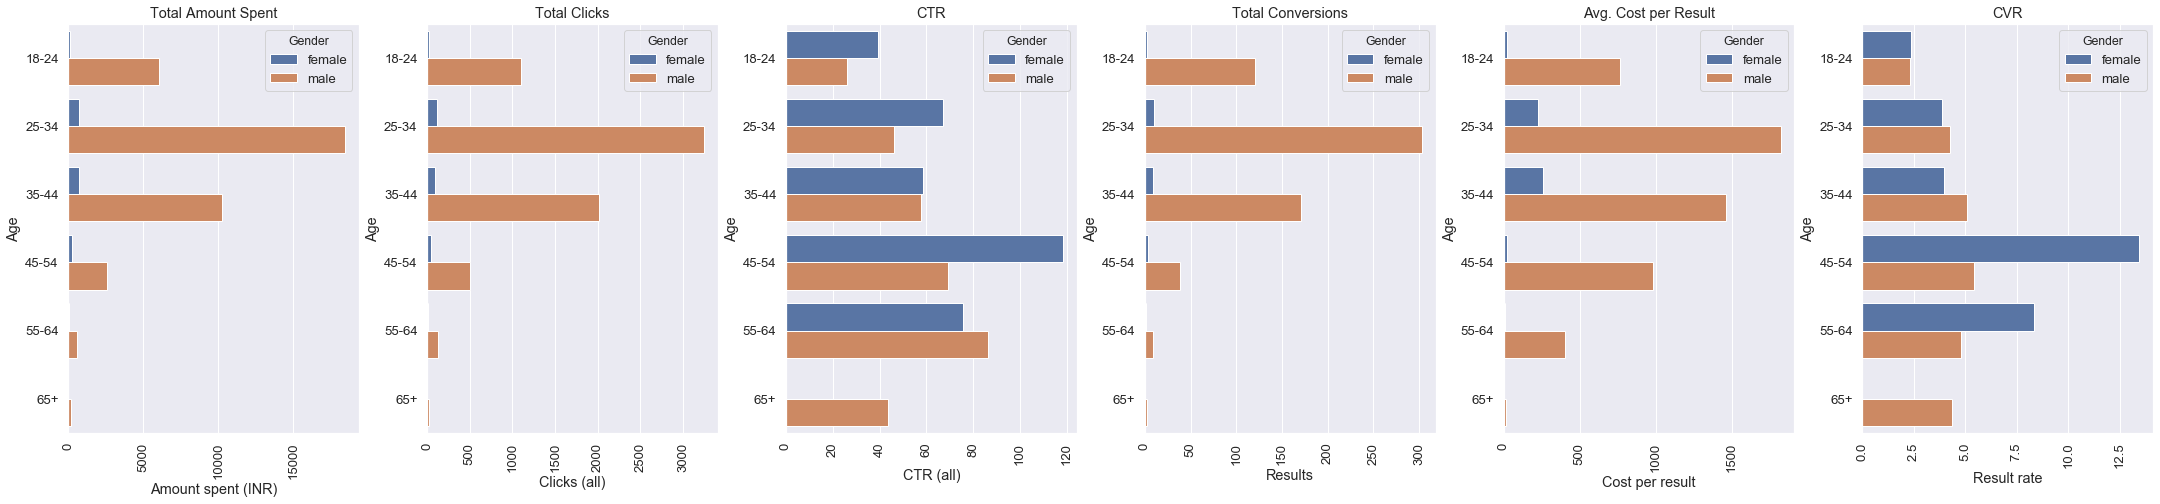

In [34]:
# increase figure size 
plt.figure(figsize = (30, 7))

# subplot 1
plt.subplot(1, 6, 1)
sns.barplot(y = 'Age', x = 'Amount spent (INR)', hue = 'Gender', data = data, estimator = np.sum, ci = None)
plt.title("Total Amount Spent")
plt.xticks(rotation = 90)


# subplot 2
plt.subplot(1, 6, 2)
sns.barplot(y = 'Age', x = 'Clicks (all)', hue = 'Gender', data = data, estimator = np.sum, ci = None)
plt.title("Total Clicks")
plt.xticks(rotation = 90)

# subplot 3
plt.subplot(1, 6, 3)
sns.barplot(y = 'Age', x = 'CTR (all)', hue = 'Gender', data = data, estimator = np.sum, ci = None)
plt.title("CTR")
plt.xticks(rotation = 90)

# subplot 4
plt.subplot(1, 6, 4)
sns.barplot(y = 'Age', x = 'Results', hue = 'Gender', data = data, estimator = np.sum, ci = None)
plt.title("Total Conversions")
plt.xticks(rotation = 90)

# subplot 5
plt.subplot(1, 6, 5)
sns.barplot(y = 'Age', x = 'Cost per result', hue = 'Gender', data = data, estimator = np.sum, ci = None)
plt.title("Avg. Cost per Result")
plt.xticks(rotation = 90)

# subplot 6
plt.subplot(1,6, 6)
sns.barplot(y = 'Age', x = 'Result rate', hue = 'Gender', data = data, estimator = np.sum, ci = None)
plt.title("CVR")
plt.xticks(rotation = 90)


plt.tight_layout(pad = 0.7)
plt.show()

### Let's Look at a Granular View

Text(0.5, 0.98, 'Avg. Click Through Rate (CTR) of Each Ad')

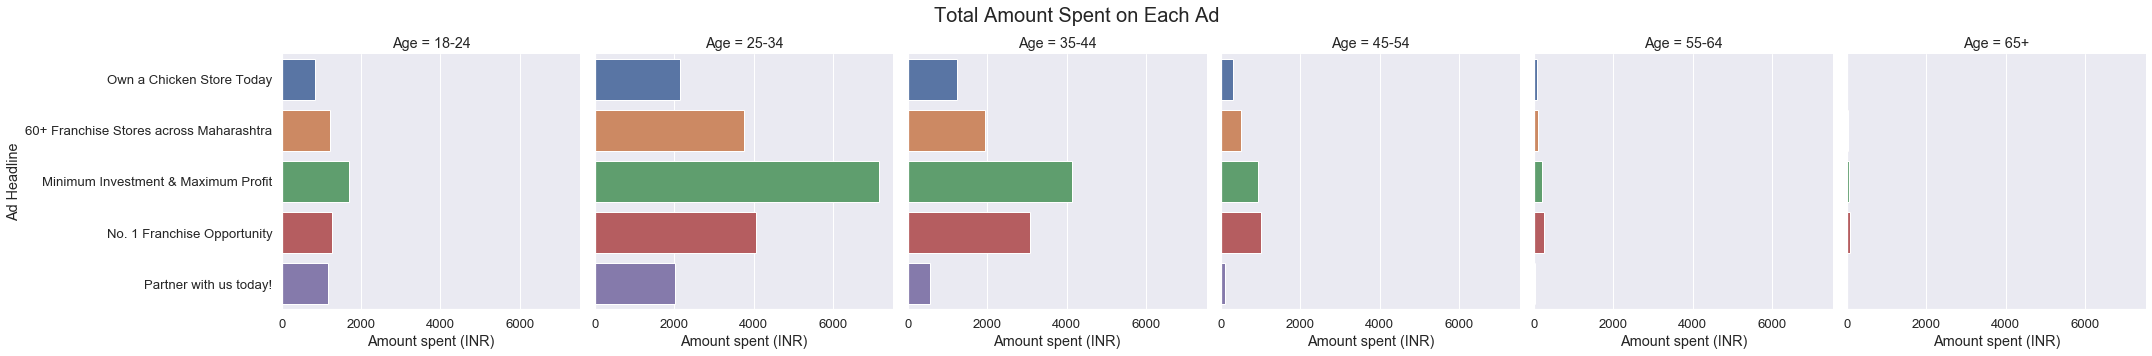

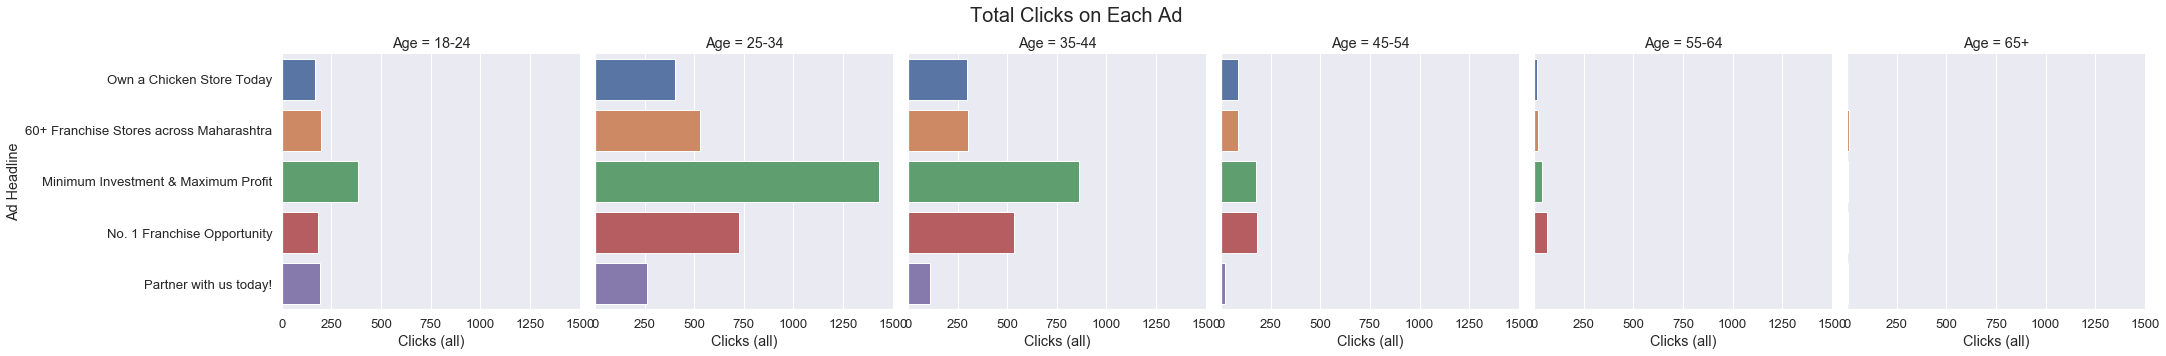

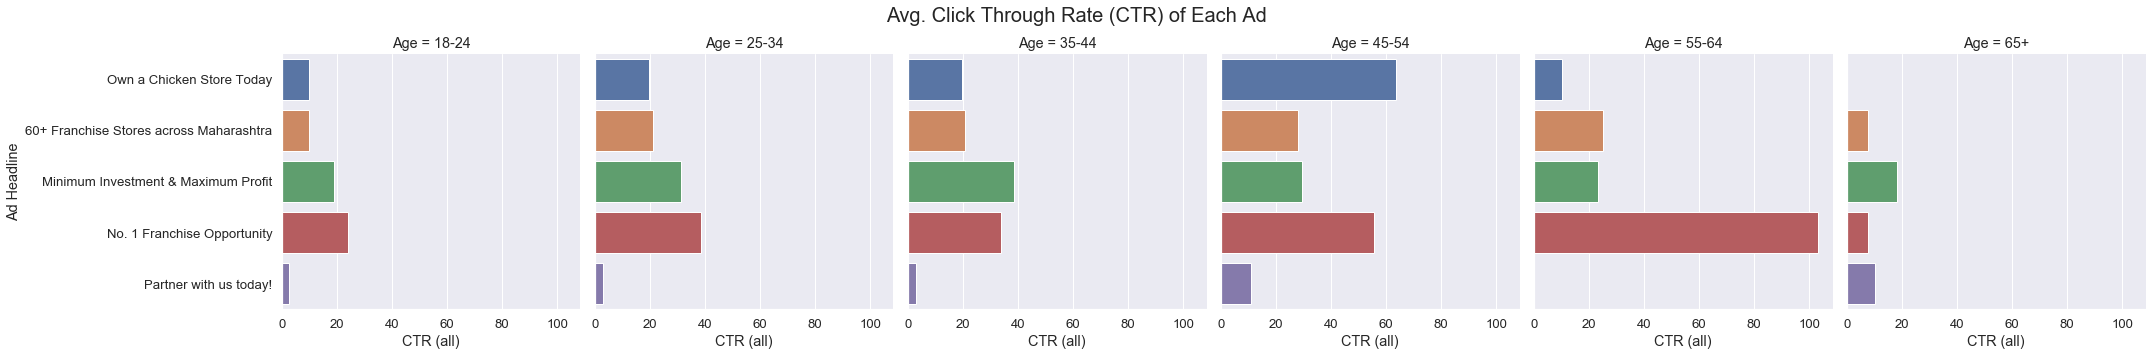

In [35]:
sns.catplot(y = 'Ad Headline', x = 'Amount spent (INR)', col = 'Age', data = data, kind = 'bar', estimator = np.sum, ci = None)
plt.subplots_adjust(top = 0.85)
plt.suptitle('Total Amount Spent on Each Ad', fontsize = 20)

sns.catplot(y = 'Ad Headline', x = 'Clicks (all)', col = 'Age', data = data, kind = 'bar', estimator = np.sum, ci = None)
plt.subplots_adjust(top = 0.85)
plt.suptitle('Total Clicks on Each Ad', fontsize = 20)

sns.catplot(y = 'Ad Headline', x = 'CTR (all)', col = 'Age', data = data, kind = 'bar', estimator = np.sum, ci = None)
plt.subplots_adjust(top = 0.85)
plt.suptitle('Avg. Click Through Rate (CTR) of Each Ad', fontsize = 20)